# Basic EDA

Let's explore one of the most famous and benchmark dataset ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic/data) from kaggle. This dataset is considered the first step to wards classification in machine learning (we will learn this in the ML section). <br>

Follow this link at [kaggle](https://www.kaggle.com/c/titanic) for detailed description on titanic dataset.<br>

**Data Dictionary**
* PassengerId
* Survived -- 0 = No, 1 = Yes
* Pclass -- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Name -- Passenger name 
* Sex -- male / female 	
* Age -- age in years	
* SibSp -- no. of siblings / spouses aboard the Titanic	
* Parch -- no. of parents / children aboard the Titanic	
* Ticket -- Ticket number	
* Fare -- Passenger fare	
* Cabin -- Cabin number	
* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

First thing first, let's import some libraries. At this stage, I am sure these libraries are not new to you!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Let's read`"titanic.csv"` dataset

## Please note, don't run the cell right above the given output, you will lose the existing output. The plots are provided for your convenience. 

**`titanic.csv` file is give, read that file into `titanic` dataframe.**

In [45]:
titanic = pd.read_csv('titanic.csv')

**How to get top 10 rows of your dataframe?**

In [46]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**How many rows/datapoints are their in the datafrmae**

In [39]:
titanic.shape
titanic.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Rename the columns to something that is more readable, your choice**. Use a new dataframe for this purpose, we are going to use titanic and same column names for the exercises in the next cells. 

In [48]:
#titanic.keys()
#titanic.describe()
#titanic.info()
titanic.rename (columns = {
    "PassengerId":"PassengerId",
    "Survived":"Survived",
    "Pclass":"PassengerClass",
    "Name":"Name",
    "Sex":"Sex",
    "Age":"Age",
    "SibSp":"Siblings#",
    "Parch":"ParentsOrChildren#",
    "Ticket":"Ticket#",
    "Fare":"PassengerFare",
    "Cabin":"Cabin#",
    "Embarked":"Embarked"},inplace = True)
titanic.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Siblings#,ParentsOrChildren#,Ticket#,PassengerFare,Cabin#,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing Data**<br>
**If there us any missing data, what is the % of that missing data in the respective column.** 

In [84]:
# code here please 
titanic.isnull().sum()
titanic.isnull().count()
missing_data = ((titanic.isnull().sum()) / (titanic.isnull().count()) * 100)
print (missing_data)

PassengerId            0.000000
Survived               0.000000
PassengerClass         0.000000
Name                   0.000000
Sex                    0.000000
Age                   19.865320
Siblings#              0.000000
ParentsOrChildren#     0.000000
Ticket#                0.000000
PassengerFare          0.000000
Cabin#                77.104377
Embarked               0.224467
dtype: float64


In [8]:
# NO CODE HERE PLEASE


**`isnull()` return `True` for all the places where the data is missing. Our dataset is large, we better think about graphical visualization using seaborn's heatmap method to visualization missing data! <br>
Re-create the heatmap given below**

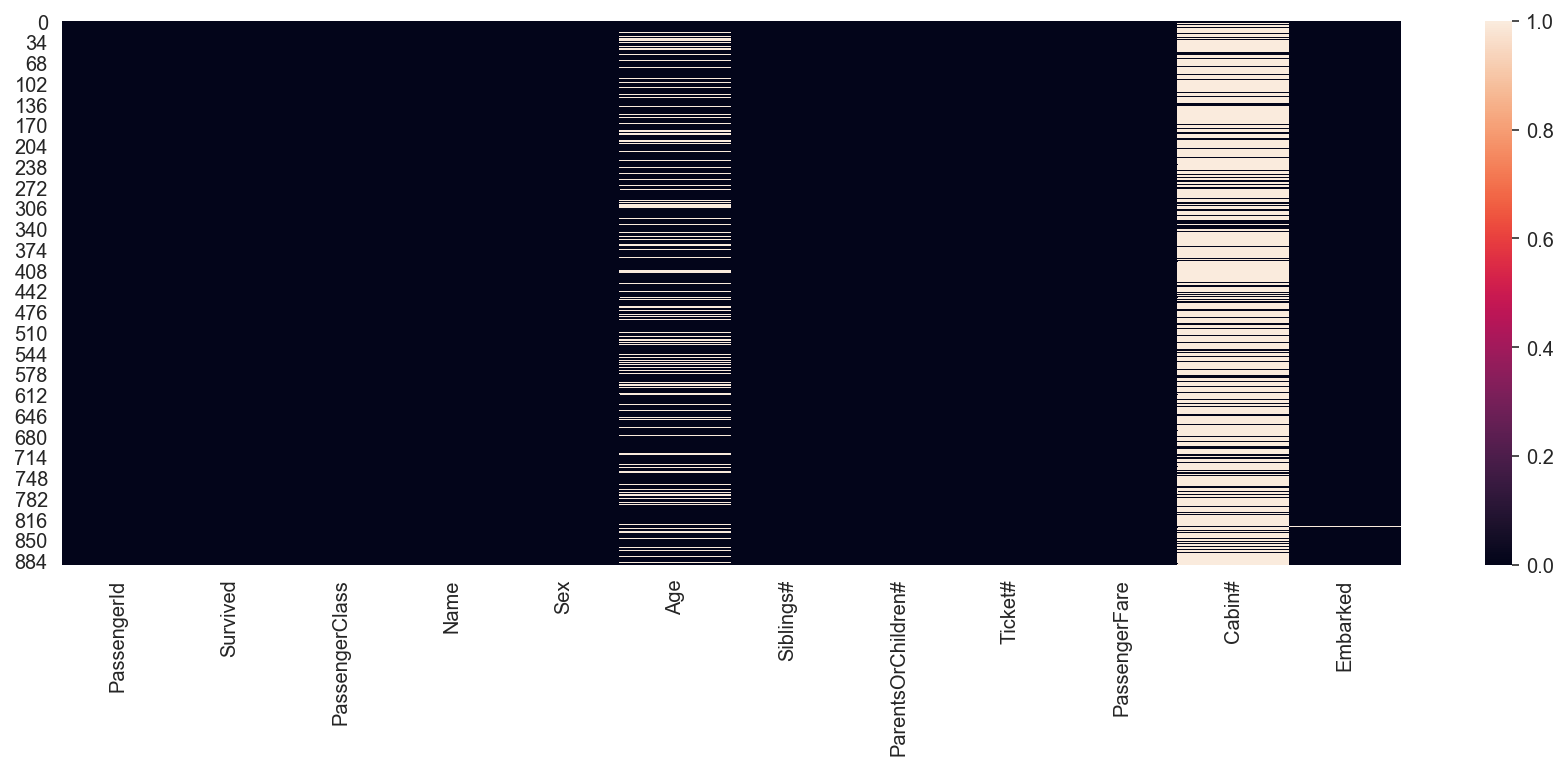

In [87]:
# Code here please. 
plt.figure(figsize=(15,5))
#sns.heatmap(titanic.isnull(),annot=True)
sns.heatmap(titanic.isnull())

#sns.heatmap(titanic.corr(),annot=True)
plt.show()
#plt.figure(figsize=(16,6))
#sns.heatmap(boston.corr(), annot=True)# vmin = 0, vmax = +1)
#plt.show()

In [88]:
# NO CODE HERE PLEASE

The above plot might be ok, but visualization of our heatmap can be improved. `yticklabels` are overlapping and the color bar is also not useful in this case.<br>
We can set `yticklabels` and `cbar` to `False` and also use `cmap = 'viridis'` for cleaner map (you can use color of your choice)!<br>
**You may want to create a heatmap given below**

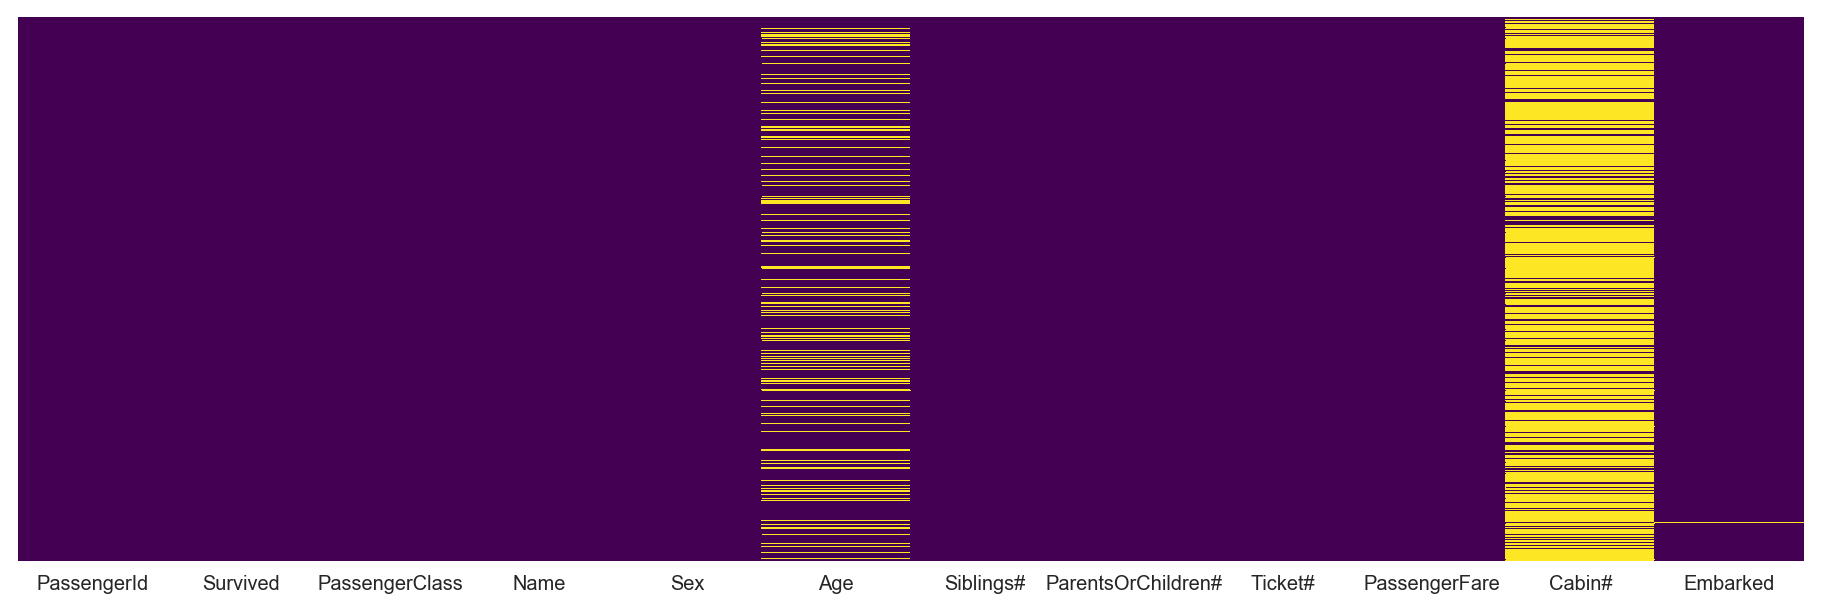

In [114]:
# code here please
plt.figure(figsize=(16,5))
#plt.figure()
sns.heatmap(titanic.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [115]:
# NO CODE HERE PLEASE

The map looks much better now.<br>
Notice, yellow are `True` which represent the missing data!<br><br>
**Well, we want to know more about the dataset<br>**
Can use get a `countplot()` to see how many people survived and how many died?

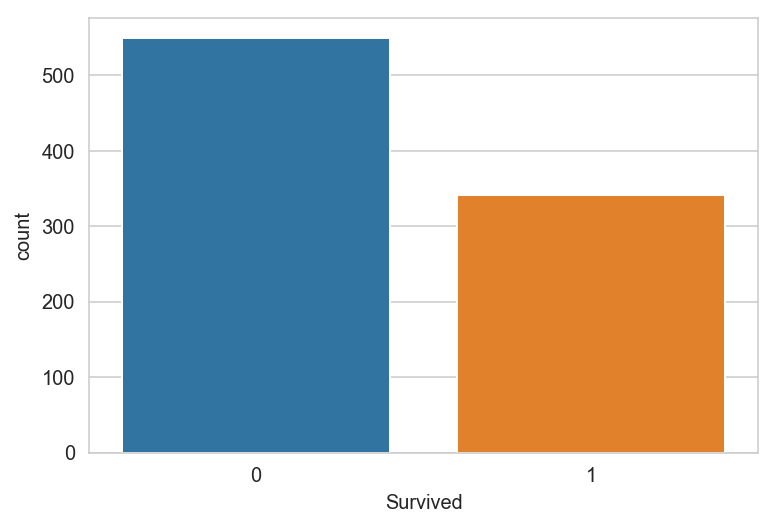

In [128]:
# code here please
#titanic.count()
sns.countplot(x='Survived',data = titanic)
#sns.countplot(x='Survived', data=titanic)# try different palette, such as 'coolwarm' or anyother!

In [14]:
# NO CODE HERE PLEASE

It's sad that not many passengers survived! <br><br>
**Let's dig into little deeper, which gender survived the most. You may want to use `hue` parameter here.**

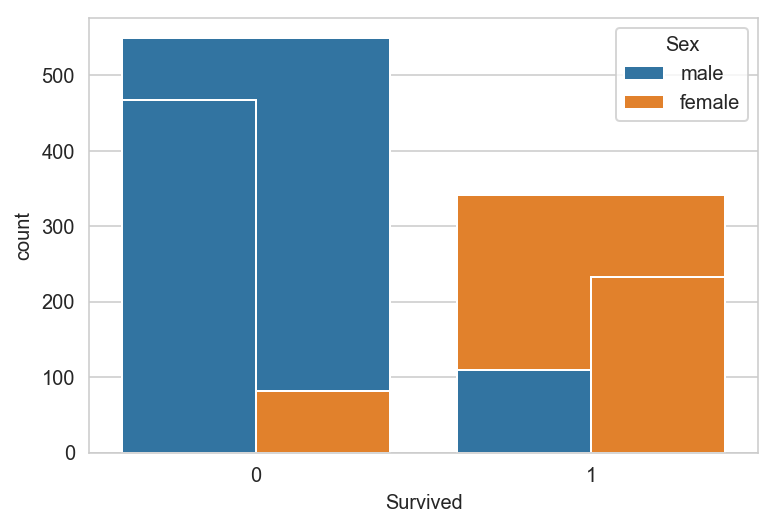

Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Sex', 'Age',
       'Siblings#', 'ParentsOrChildren#', 'Ticket#', 'PassengerFare', 'Cabin#',
       'Embarked'],
      dtype='object')

In [141]:
# code here please
sns.countplot(x='Survived',data = titanic)
sns.countplot(data=titanic,x='Survived',hue='Sex')
plt.show()
titanic.keys()

In [16]:
# NO CODE HERE PLEASE

**What was the age distribution of the passengers on titanic?** Try without dropping missing data in age and after dropping missing data. Compare your distplots, do you find any difference?

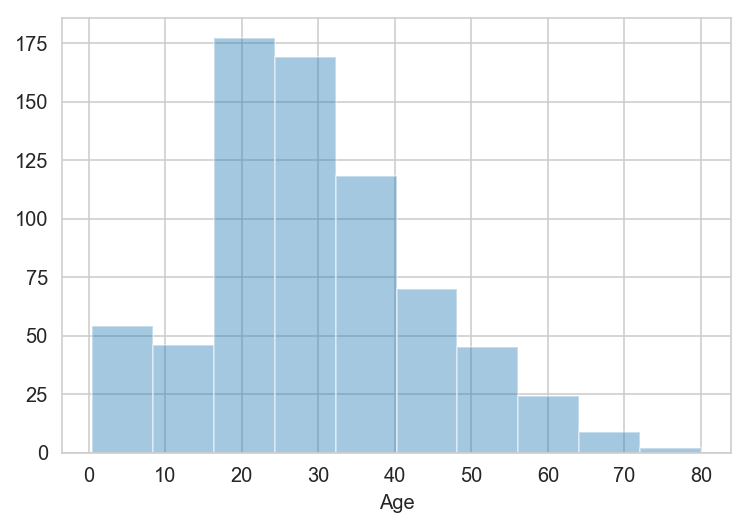

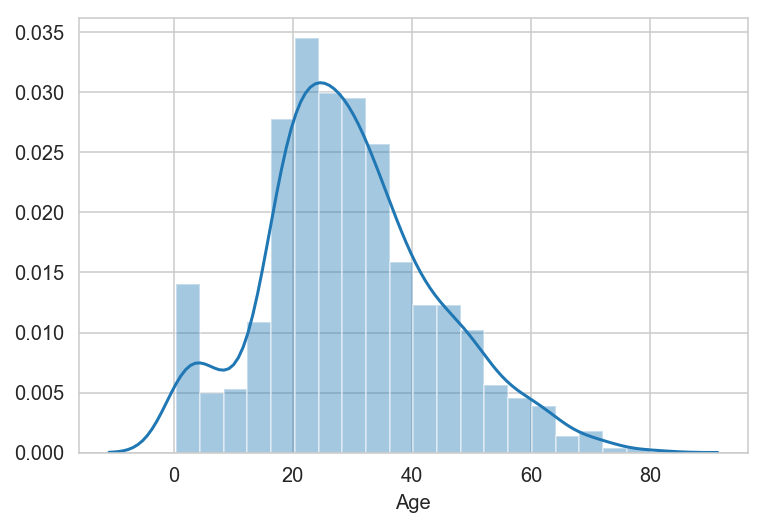

In [190]:
# code here please
#sns.countplot(data=titanic, x='Age') # my answer

sns.distplot( a= titanic['Age'], bins = 10,kde=False)
plt.show()
sns.distplot(a = titanic['Age'].dropna()) # I didn't see the different 
plt.show()


In [18]:
# NO CODE HERE PLEASE

**Recreate the boxplot below, is there any relation between Pclass (passenger class) and age?**

Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Sex', 'Age',
       'Siblings#', 'ParentsOrChildren#', 'Ticket#', 'PassengerFare', 'Cabin#',
       'Embarked'],
      dtype='object')

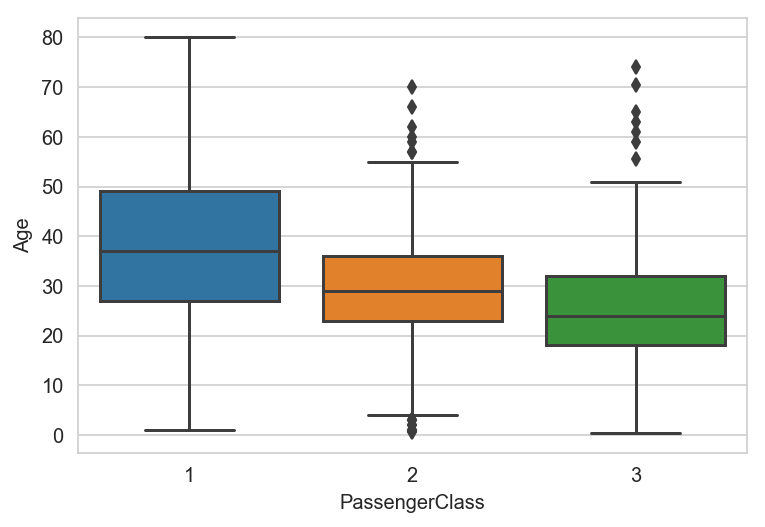

In [204]:
# code here please
sns.boxplot(data = titanic, x='PassengerClass',y='Age')
#sns.countplot(data=titanic, x='PassengerClass', hue="Age")
titanic.keys()

In [20]:
# NO CODE HERE PLEASE

**Create the plot below, what is the type of this plot?**

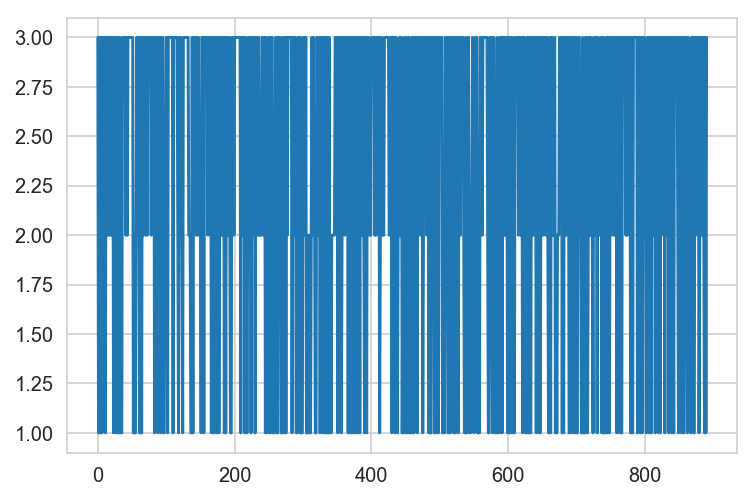

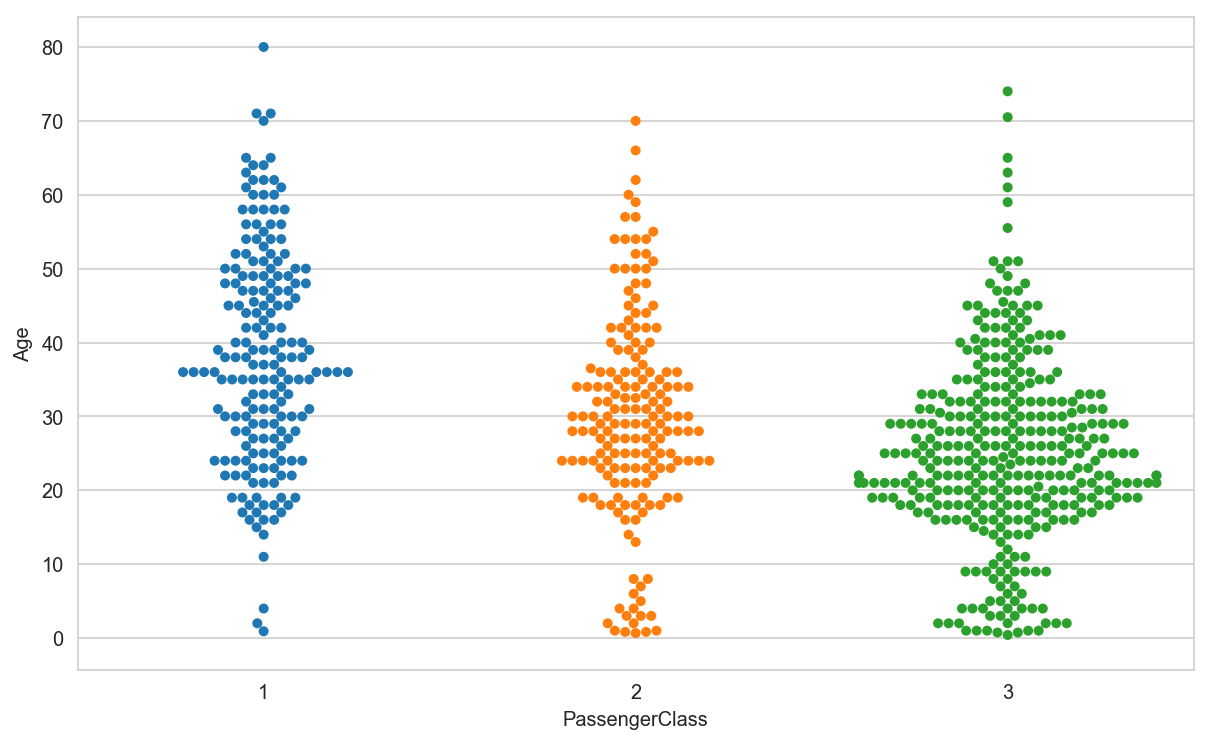

In [225]:
# code here please
plt.plot(titanic['PassengerClass']) #he said plot 
plt.show()
plt.figure(figsize=(10,6))
sns.swarmplot(data=titanic,x= "PassengerClass", y = "Age")

In [22]:
# NO CODE HERE PLEASE

Try to create more plots, something you think is the best plot for data visualizations. See the lecture note book for range of plotting options. 